# Project 1: Recreate - Remix
Comment: I am 75% through my recreate part, I still need to fix my y axis and the labels for each bar. 
I have an idea about my remix and once I am done with recreate, I am hoping that remix won't take me too long. 


## Part 1: Recreating Figure 
- Comparison of SDEs in comparison to other roles. 
- In 2022, Software developers earned an average of $141,138, $76,455 more than the average national salary of $64,683


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
file = "Yearly Wage Ranking.csv"
df = pd.read_csv(file)

In [23]:
df.head()

,ID Detailed Occupation,Detailed Occupation,ID Year,Year,ID Workforce Status,Workforce Status,Average Wage,Average Wage Appx MOE,Slug Detailed Occupation,Ranking,Shape,Type,Type ID
0,291240,Surgeons,2022,2022,True,True,381852.622484,23557.983973,surgeons,1,Bar,Top,1
1,291210,Physicians,2022,2022,True,True,0.000000,5147.691377,physicians,2,Bar,NaN,99
2,193011,Economists,2022,2022,True,True,153241.403730,17087.646490,economists,15,Bar,Neighbors,2
3,419031,Sales engineers,2022,2022,True,True,148880.532634,11981.863784,sales-engineers,16,Bar,Neighbors,2
4,113021,Computer & information systems managers,2022,2022,True,True,143483.983798,3051.490693,computer-information-systems-managers,17,Bar,Neighbors,2


In [24]:
# Filter the data for the top and bottom ranked occupations
top_bottom_df = df[df['Ranking'].isin([1, 2, 15, 16, 17, 18, 19, 20, 21, 528, 529])]

In [25]:
print(top_bottom_df)

    ID Detailed Occupation                                Detailed Occupation  \
0                   291240                                           Surgeons   
1                   291210                                         Physicians   
2                   193011                                         Economists   
3                   419031                                    Sales engineers   
4                   113021            Computer & information systems managers   
5                   151252                                Software developers   
6                   112022                                     Sales managers   
7                   172061                        Computer hardware engineers   
8                   132051                                 Financial analysts   
9                   393031          Ushers, lobby attendants, & ticket takers   
10                  359031  Hosts & hostesses, restaurant, lounge, & coffe...   

    ID Year  Year  ID Workf

/var/folders/sh/cb18dbvn3v9b80sk1g_qrcrw0000gn/T/ipykernel_66969/1581191853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


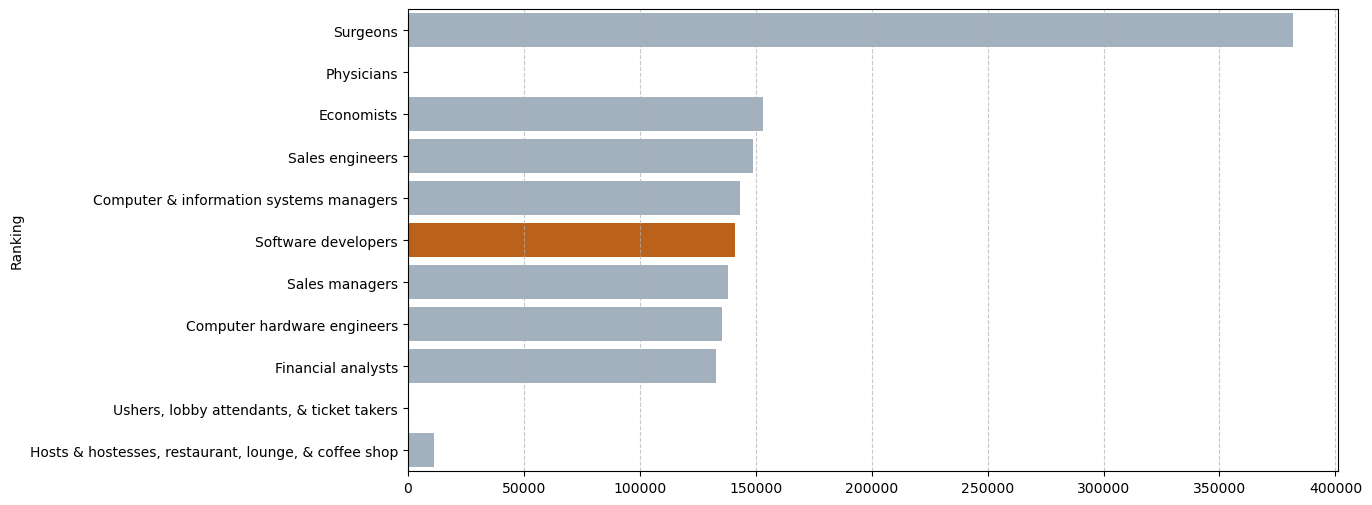

In [50]:
# Create a highlight column for software developers
top_bottom_df['Highlight'] = top_bottom_df['Detailed Occupation'] == "Software developers"

# Set up the plot
plt.figure(figsize=(12, 6))
colors = ['#d55e00' if highlight else '#9eb0c3' for highlight in top_bottom_df['Highlight']]

sns.barplot(
    data=top_bottom_df, 
    x='Average Wage', 
    y='Detailed Occupation', 
    palette=colors
)

# Adjust aesthetics to match the original figure
plt.xlabel("")
plt.ylabel("Ranking")
plt.title("")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()